In [1]:
#IMPORT STATEMENTS
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim


# **Data Transformation**

In [2]:
transform=transforms.Compose([
          transforms.Resize((28,28)),
          transforms.ToTensor()
          ])

# **Load Dataset**

In [3]:
train_set=ImageFolder('/kaggle/input/flowers-dataset/train',transform)
test_set =ImageFolder('/kaggle/input/flowers-dataset/test', transform)

In [4]:
print("Train",len(train_set))
print("Test",len(test_set))

Train 1275
Test 182


# **Each element is a tuple which consists of an image tensor and label**

In [5]:
tensor_img,label=train_set[0]
print(tensor_img.shape)
print(label)

torch.Size([3, 28, 28])
0


# **Load data in batches**

In [6]:
test =DataLoader(test_set,batch_size=32,shuffle=False)
train=DataLoader(train_set,batch_size=32,shuffle=True)

In [7]:
len(train)

40

In [8]:
#anlaysis of individual batch
for tensor_img, label in train:
    print(tensor_img.shape)
    print(label)
    break  


torch.Size([32, 3, 28, 28])
tensor([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1])


# **CNN MODEL**

In [9]:
class CNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.model=nn.Sequential(
        
        # Convolutional layers
        nn.Conv2d(3,32,(3,3)),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

        nn.Conv2d(32,64,(3,3)),
        nn.ReLU(),
       
        nn.Flatten(),
        #Fully Connected Layers
        nn.Linear(64*11*11,2),
        )
        
    def forward(self, x):
        return model(x)


# **Training the model**

In [10]:
import matplotlib.pyplot as plt

def fit(clf, train, test, criterion, optimizer, epochs):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(epochs):
        train_loss = 0.0
        train_correct = 0
        clf.model.train()

        for inputs, labels in train:
            optimizer.zero_grad()
            outputs = clf.model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            pred = torch.argmax(outputs, 1)
            train_correct += torch.sum(pred == labels.data)

        train_loss /= len(train.dataset)
        train_acc = train_correct.double() / len(train.dataset)

        # Validation
        val_loss = 0.0
        val_correct = 0
        clf.model.eval()

        with torch.no_grad():
            for inputs, labels in test:
                outputs = clf.model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                pred = torch.argmax(outputs, 1)
                val_correct += torch.sum(pred == labels.data)

        val_loss /= len(test.dataset)
        val_acc = val_correct.double() / len(test.dataset)

        # Record the losses and accuracies
        train_losses.append(train_loss)
        train_accuracies.append(train_acc.item())
        val_losses.append(val_loss)
        val_accuracies.append(val_acc.item())

        print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    return clf.model, train_losses, train_accuracies, val_losses, val_accuracies


# **Define Loss Function and Optimizer**

In [11]:
clf=CNN()
LossFunc=nn.CrossEntropyLoss()
optimizer=optim.Adam(clf.parameters(),lr=0.001)

In [12]:
model, train_losses, train_accuracies, val_losses, val_accuracies = fit(clf, train,test, LossFunc, optimizer, epochs=20)


Epoch 1/20 - Training Loss: 0.6690, Train Accuracy: 0.6055, Validation Loss: 0.5815, Validation Accuracy: 0.7527
Epoch 2/20 - Training Loss: 0.5545, Train Accuracy: 0.7286, Validation Loss: 0.5545, Validation Accuracy: 0.7363
Epoch 3/20 - Training Loss: 0.5180, Train Accuracy: 0.7545, Validation Loss: 0.5916, Validation Accuracy: 0.6813
Epoch 4/20 - Training Loss: 0.4766, Train Accuracy: 0.7725, Validation Loss: 0.4486, Validation Accuracy: 0.8187
Epoch 5/20 - Training Loss: 0.4546, Train Accuracy: 0.7929, Validation Loss: 0.4666, Validation Accuracy: 0.7857
Epoch 6/20 - Training Loss: 0.4309, Train Accuracy: 0.8047, Validation Loss: 0.4162, Validation Accuracy: 0.8352
Epoch 7/20 - Training Loss: 0.4320, Train Accuracy: 0.8031, Validation Loss: 0.4010, Validation Accuracy: 0.8407
Epoch 8/20 - Training Loss: 0.4187, Train Accuracy: 0.8157, Validation Loss: 0.4199, Validation Accuracy: 0.8407
Epoch 9/20 - Training Loss: 0.4188, Train Accuracy: 0.8086, Validation Loss: 0.4135, Validation 

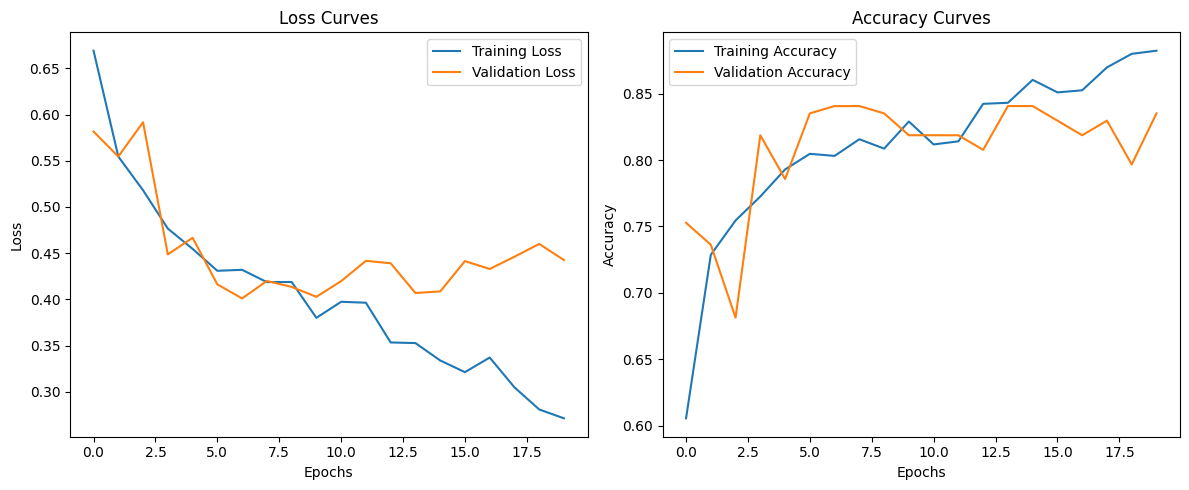

In [13]:
# Plot Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("Loss_Curve")

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("Accuracy_Curve")
plt.tight_layout()
plt.show()

# **EVALUATION**

In [14]:
import numpy as np
# Get predictions and true labels
def get_predictions(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Convert to numpy
            all_labels.extend(labels.cpu().numpy())  # Convert to numpy
            
    return np.array(all_preds), np.array(all_labels)

# Get predictions on test set
predictions, true_labels = get_predictions(clf.model, test)

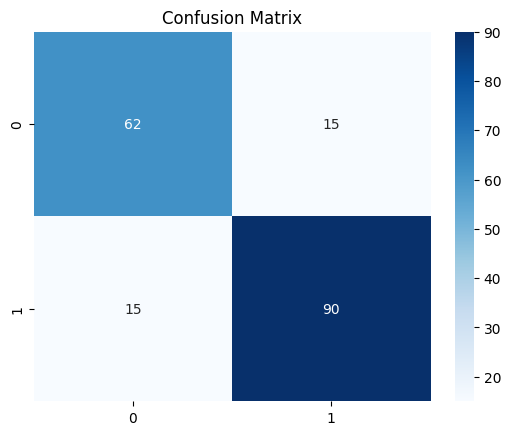

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display confusion matrix
disp = sns.heatmap(cm,annot=True,cmap="Blues")
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix")
plt.show()



In [23]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
accuracy=accuracy_score(true_labels, predictions)
precision=precision_score(true_labels, predictions)
recall=recall_score(true_labels, predictions)
f1=f1_score(true_labels, predictions)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

Accuracy:  0.8351648351648352
Precision:  0.8571428571428571
Recall:  0.8571428571428571
F1 Score:  0.8571428571428571


# **PREDICTION ON IMAGE**

In [17]:
classes=["Daisy","Dandellion"]
from PIL import Image

path=r"/kaggle/input/flowers-dataset/test/daisy/10466558316_a7198b87e2_jpg.rf.7acf642b94dc98daa49482a12994ac4c.jpg"
image=Image.open(path)
image_tensor=transform(image)
img=image_tensor.unsqueeze(0)

with torch.no_grad():
    pred = clf.model(img)

pred_index=pred.argmax(1)
pred_class=classes[pred_index.item()]
print(f"Predicted class:{pred_class}")


Predicted class:Daisy


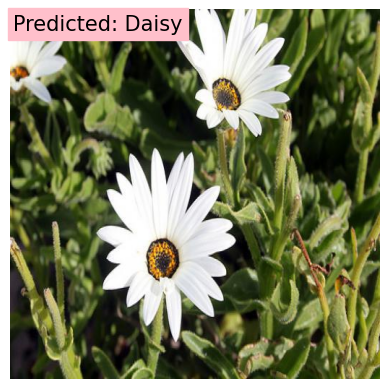

In [18]:
import numpy as np
image=np.array(image)
plt.axis("off")
plt.text(4,28,f"Predicted: {pred_class}",fontsize=15,backgroundcolor="pink")
plt.imshow(image)
plt.savefig("output1")

In [19]:
classes=["Daisy","Dandellion"]
from PIL import Image

path=r"/kaggle/input/flowers-dataset/test/dandelion/1241011700_261ae180ca_jpg.rf.53eafd845f17fbf30ebd87b04312a4e8.jpg"
image=Image.open(path)
image_tensor=transform(image)
img=image_tensor.unsqueeze(0)

with torch.no_grad():
    pred = clf.model(img)

pred_index=pred.argmax(1)
pred_class=classes[pred_index.item()]
print(f"Predicted class:{pred_class}")

Predicted class:Dandellion


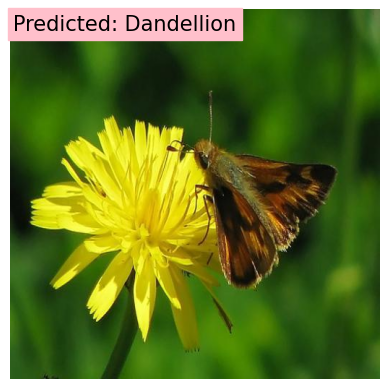

In [20]:
import numpy as np
import matplotlib.pyplot as plt
image=np.array(image)
plt.axis("off")
plt.text(4,28,f"Predicted: {pred_class}",fontsize=15,backgroundcolor="pink")
plt.imshow(image)
plt.savefig("output2")

In [21]:
torch.save(model,"cnn_image_classification_model.pt")